First off we load a JavaScript extension for yadage widget, so that we can track workflow progress visually

In [49]:
%%javascript
require.config({paths: {
        vis: "http://cdnjs.cloudflare.com/ajax/libs/vis/4.17.0/vis",
        yadage: "https://rawgit.com/lukasheinrich/yadage-ipython/master/yadagealpha"
    }
});

<IPython.core.display.Javascript object>

On the python side, we start with some basic imports...

In [50]:
import os
import shutil
from packtivity.statecontexts import poxisfs_context as statecontext
from yadage.yadagemodels import YadageWorkflow
from yadage.workflow_loader import workflow
from yadage.clihelpers import setupbackend_fromstring, prepare_workdir_from_archive
import logging
logging.basicConfig()

Now we prepare for running the workflow, cleaning up any residues of previous runs, loading the workflow spec from a public repository and setting workflow parameters

In [51]:
toplevel = 'https://raw.githubusercontent.com/lukasheinrich/weinberg-exp/master/example_yadage'

#clean up work directory
workdir = 'fromipython'
try:
    shutil.rmtree(workdir)
#     prepare_workdir_from_archive(workdir, '{}/input.zip'.format(toplevel))
except OSError:
    pass

#load workflow 

#load the JSON wflow spec
wflowspec = workflow('madgraph_rivet.yml','from-github/phenochain') 
#define root workdirectory in which data fragements will end up 
rootcontext = statecontext.make_new_context(workdir)  
#finally create a workflow object
wflow = YadageWorkflow.createFromJSON(wflowspec,rootcontext)



wflow.view().init({'nevents':1000,'rivet_analysis':'MC_GENERIC'})
#set up a backend that we will use
backend = setupbackend_fromstring('multiproc:4')
#options are: multiprocessing pool, ipython cluster, celery cluster

Now that we have the workflow ready, let's give ourselves a nice ui object with which we can interact

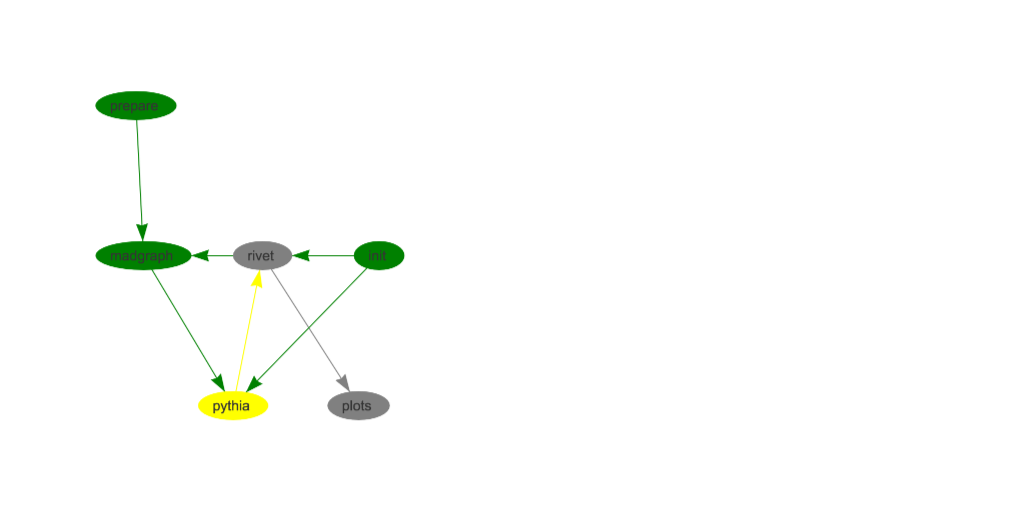

In [52]:
import yadage_widget
ui = yadage_widget.WorkflowWidget(wflow)
ui

One option is to run the workflow in *headless mode*, without any manual intervention

In [ ]:
from adage import rundag
rundag(wflow, update_interval = 1, backend = backend,  additional_trackers=[ui.adagetracker])

Let's reset the workflow completely, so that we can demo some other nice features

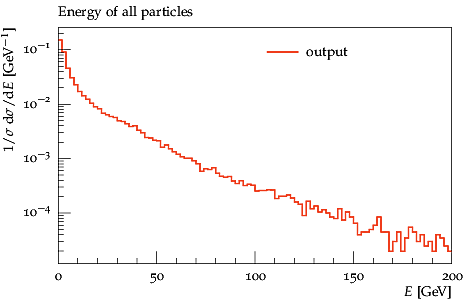

In [48]:
from IPython.display import Image
Image('{}/MC_GENERIC/E.png'.format(wflow.view().getSteps('plots')[0].result['plots']))